In [ ]:
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)
  

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df["Amino Acid"], rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    return axe


In [ ]:
df_ipro_sen=pd.read_csv("/content/drive/MyDrive/Bayezid sir/residue_level/database/amino_acid_analysis/iprodna_sensitivity.csv")
df_ipro_spe=pd.read_csv("/content/drive/MyDrive/Bayezid sir/residue_level/database/amino_acid_analysis/iprodna_specificity.csv")
df_us_sen=pd.read_csv("/content/drive/MyDrive/Bayezid sir/residue_level/database/amino_acid_analysis/us_sensitivity.csv")
df_us_spe=pd.read_csv("/content/drive/MyDrive/Bayezid sir/residue_level/database/amino_acid_analysis/us_specificity.csv")

In [ ]:
df1=df_us_sen[["Unnamed: 0","PDNA_224"]]
df1=df1.rename(columns={"Unnamed: 0":"Amino Acid","PDNA_224":"ABC(PDNA 224)"})
df1_=df_ipro_sen[["PDNA_224"]]
df1_=df1_.rename(columns={"PDNA_224":"iProDNA(PDNA 224)"})


df1=pd.concat([df1,df1_],axis=1)



df2=df_us_sen[["Unnamed: 0","PDNA_316"]]
df2=df2.rename(columns={"Unnamed: 0":"Amino Acid","PDNA_316":"ABC(PDNA 316)"})
df2_=df_ipro_sen[["PDNA_316"]]
df2_=df2_.rename(columns={"PDNA_316":"iProDNA(PDNA 316)"})


df2=pd.concat([df2,df2_],axis=1)



df3=df_us_sen[["Unnamed: 0","PDNA_543"]]
df3=df3.rename(columns={"Unnamed: 0":"Amino Acid","PDNA_543":"ABC(PDNA 543)"})
df3_=df_ipro_sen[["PDNA_543"]]
df3_=df3_.rename(columns={"PDNA_543":"iProDNA(PDNA 543)"})


df3=pd.concat([df3,df3_],axis=1)

In [ ]:
#df1 = df1[["Amino Acid","ABC","iProDNA"]]
df1=df1.set_index('Amino Acid')
df2=df2.set_index('Amino Acid')
df3=df3.set_index('Amino Acid')


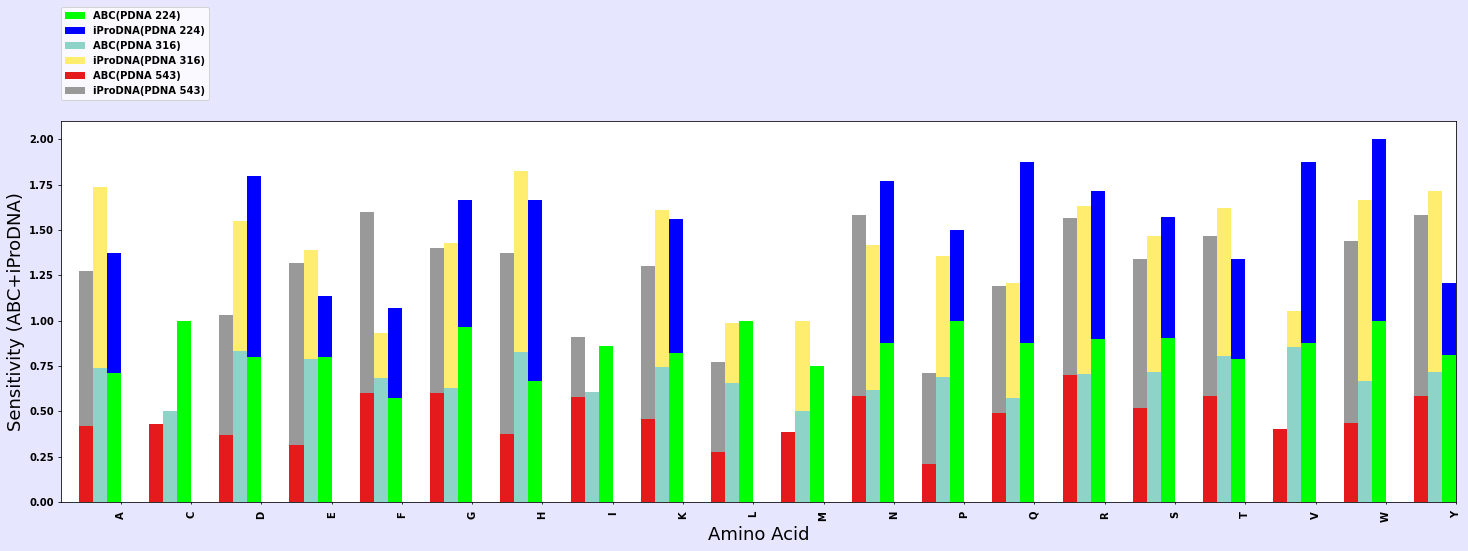

In [ ]:

import pandas as pd
from matplotlib import rc,rcParams

#df = pd.DataFrame({'a':[10, 20], 'b': [15, 25], 'c': [35, 40], 'd':[45, 50]}, index=['john', 'bob'])
plt.rcParams.update({
    "font.weight": "bold",
    'font.size': 10.0,
    "xtick.major.size": 2,
    "xtick.major.pad": 7,
    "xtick.labelsize": 10,
    "axes.labelsize":10,
    "grid.color": "0.5",
    "grid.linestyle": "-",
    "grid.linewidth": 5,
    "lines.linewidth": 2,
    "lines.color": "g",
    'axes.labelsize': 18,
})
fig, ax = plt.subplots(figsize=(25,7),facecolor=(0.9, 0.9, 1))
ax.set_xlabel("Amino Acids")
ax.set_ylabel("Sensitivity (ABC+iProDNA)")

df1[['ABC(PDNA 224)', 'iProDNA(PDNA 224)']].plot.bar(stacked=True, width=0.2, position=1, colormap="brg_r", ax=ax, alpha=1)
df2[['ABC(PDNA 316)', 'iProDNA(PDNA 316)']].plot.bar(stacked=True, width=0.2, position=2, colormap="Set3", ax=ax, alpha=1)
df3[['ABC(PDNA 543)', 'iProDNA(PDNA 543)']].plot.bar(stacked=True, width=0.2, position=3, colormap="Set1", ax=ax, alpha=1)

plt.legend(bbox_to_anchor=(0, 1.3), loc='upper left', borderaxespad=0)
plt.show()
fig.savefig('sensitivity', bbox_inches='tight',dpi=300)

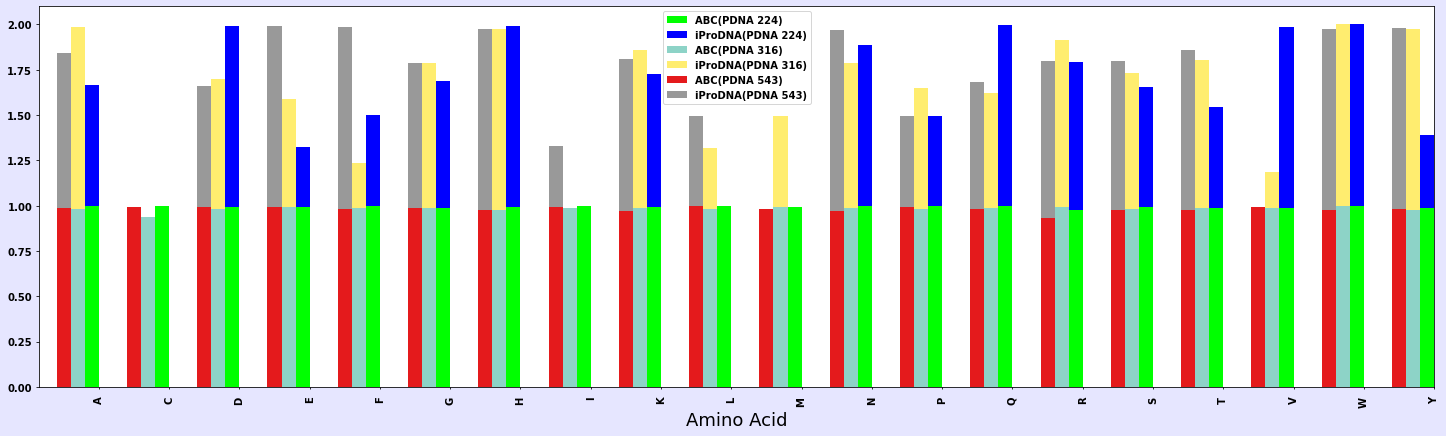

In [ ]:
df1=df_us_spe[["Unnamed: 0","PDNA_224"]]
df1=df1.rename(columns={"Unnamed: 0":"Amino Acid","PDNA_224":"ABC(PDNA 224)"})
df1_=df_ipro_sen[["PDNA_224"]]
df1_=df1_.rename(columns={"PDNA_224":"iProDNA(PDNA 224)"})


df1=pd.concat([df1,df1_],axis=1)



df2=df_us_spe[["Unnamed: 0","PDNA_316"]]
df2=df2.rename(columns={"Unnamed: 0":"Amino Acid","PDNA_316":"ABC(PDNA 316)"})
df2_=df_ipro_sen[["PDNA_316"]]
df2_=df2_.rename(columns={"PDNA_316":"iProDNA(PDNA 316)"})


df2=pd.concat([df2,df2_],axis=1)



df3=df_us_spe[["Unnamed: 0","PDNA_543"]]
df3=df3.rename(columns={"Unnamed: 0":"Amino Acid","PDNA_543":"ABC(PDNA 543)"})
df3_=df_ipro_sen[["PDNA_543"]]
df3_=df3_.rename(columns={"PDNA_543":"iProDNA(PDNA 543)"})


df3=pd.concat([df3,df3_],axis=1)



#df1 = df1[["Amino Acid","ABC","iProDNA"]]
df1=df1.set_index('Amino Acid')
df2=df2.set_index('Amino Acid')
df3=df3.set_index('Amino Acid')





import pandas as pd
from matplotlib import rc,rcParams

#df = pd.DataFrame({'a':[10, 20], 'b': [15, 25], 'c': [35, 40], 'd':[45, 50]}, index=['john', 'bob'])
plt.rcParams.update({
    "font.weight": "bold",
    'font.size': 10.0,
    "xtick.major.size": 2,
    "xtick.major.pad": 7,
    "xtick.labelsize": 10,
    "axes.labelsize":10,
    "grid.color": "0.5",
    "grid.linestyle": "-",
    "grid.linewidth": 5,
    "lines.linewidth": 2,
    "lines.color": "g",
    'axes.labelsize': 18,
})
fig, ax = plt.subplots(figsize=(25,7),facecolor=(0.9, 0.9, 1))

df1[['ABC(PDNA 224)', 'iProDNA(PDNA 224)']].plot.bar(stacked=True, width=0.2, position=1, colormap="brg_r", ax=ax, alpha=1)
df2[['ABC(PDNA 316)', 'iProDNA(PDNA 316)']].plot.bar(stacked=True, width=0.2, position=2, colormap="Set3", ax=ax, alpha=1)
df3[['ABC(PDNA 543)', 'iProDNA(PDNA 543)']].plot.bar(stacked=True, width=0.2, position=3, colormap="Set1", ax=ax, alpha=1)

plt.show()
fig.savefig("Specificity.png",dpi=300)
